# Изазов: Анализа текста о науци о подацима

> *У овом нотебуку експериментишемо са коришћењем различитих URL-ова - Википедијски чланак о машинском учењу. Можете видети да, за разлику од науке о подацима, овај чланак садржи много термина, што анализу чини проблематичнијом. Морамо смислити други начин за чишћење података након екстракције кључних речи, како бисмо се ослободили неких честих, али не значајних комбинација речи.*

У овом примеру, урадићемо једноставну вежбу која покрива све кораке традиционалног процеса науке о подацима. Не морате писати никакав код, можете само кликнути на ћелије испод да их извршите и посматрате резултат. Као изазов, охрабрујемо вас да испробате овај код са различитим подацима.

## Циљ

У овој лекцији разговарали смо о различитим концептима везаним за науку о подацима. Покушајмо да откријемо више повезаних концепата кроз **рударење текста**. Почећемо са текстом о науци о подацима, извући кључне речи из њега, а затим покушати да визуализујемо резултат.

Као текст, користићу страницу о науци о подацима са Википедије:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Корак 1: Преузимање података

Први корак у сваком процесу обраде података је преузимање података. Користићемо библиотеку `requests` за то:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Корак 2: Претварање података

Следећи корак је претварање података у облик погодан за обраду. У нашем случају, преузели смо HTML изворни код са странице и потребно је да га конвертујемо у обичан текст.

Постоји много начина да се ово уради. Ми ћемо користити најједноставнији уграђени [HTMLParser](https://docs.python.org/3/library/html.parser.html) објекат из Python-а. Потребно је да наследимо `HTMLParser` класу и дефинишемо код који ће сакупљати сав текст унутар HTML ознака, осим `<script>` и `<style>` ознака.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Корак 3: Добијање увида

Најважнији корак је претварање наших података у облик из којег можемо извући увиде. У нашем случају, желимо да извучемо кључне речи из текста и видимо које кључне речи су значајније.

Користићемо Python библиотеку под називом [RAKE](https://github.com/aneesha/RAKE) за издвајање кључних речи. Прво, хајде да инсталирамо ову библиотеку у случају да није већ присутна:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Главна функционалност је доступна из `Rake` објекта, који можемо прилагодити користећи неке параметре. У нашем случају, подесићемо минималну дужину кључне речи на 5 карактера, минималну учесталост кључне речи у документу на 3, и максималан број речи у кључној речи на 2. Слободно експериментишите са другим вредностима и посматрајте резултат.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Добили смо листу термина заједно са одговарајућим степеном важности. Као што можете видети, најрелевантније дисциплине, као што су машинско учење и велики подаци, налазе се на врху листе.

## Корак 4: Визуелизација резултата

Људи најбоље тумаче податке у визуелном облику. Због тога често има смисла визуелизовати податке како бисмо извукли одређене увиде. Можемо користити библиотеку `matplotlib` у Пајтону за креирање једноставне дистрибуције кључних речи са њиховом релевантношћу:


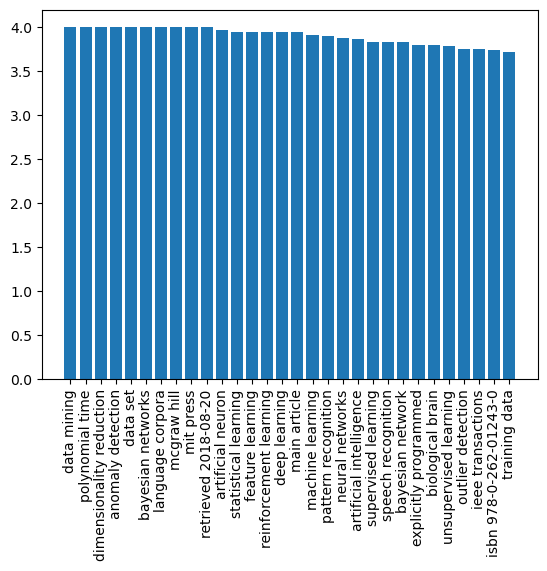

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Међутим, постоји још бољи начин за визуелизацију учесталости речи - коришћењем **облака речи**. Биће нам потребно да инсталирамо још једну библиотеку како бисмо приказали облак речи из наше листе кључних речи.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` објекат је одговоран за примање или оригиналног текста, или унапред израчунате листе речи са њиховим фреквенцијама, и враћа слику, која затим може бити приказана коришћењем `matplotlib`:


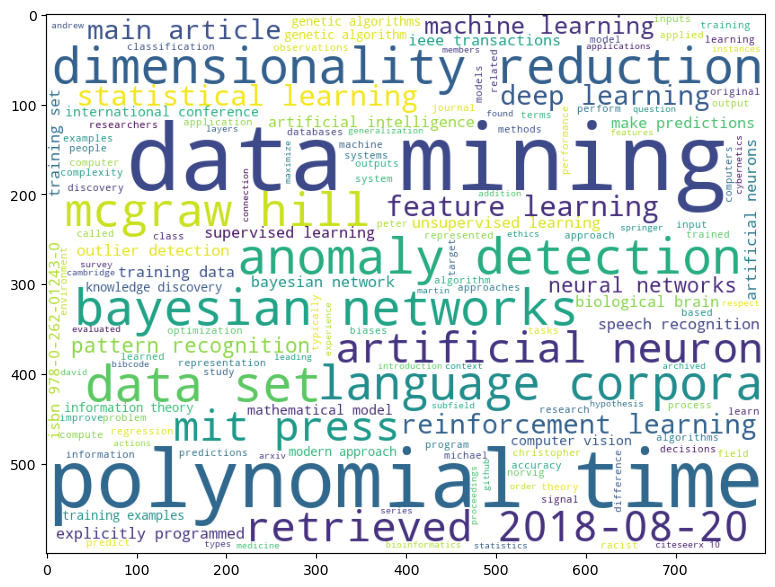

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Можемо такође проследити оригинални текст у `WordCloud` - хајде да видимо да ли можемо добити сличан резултат:


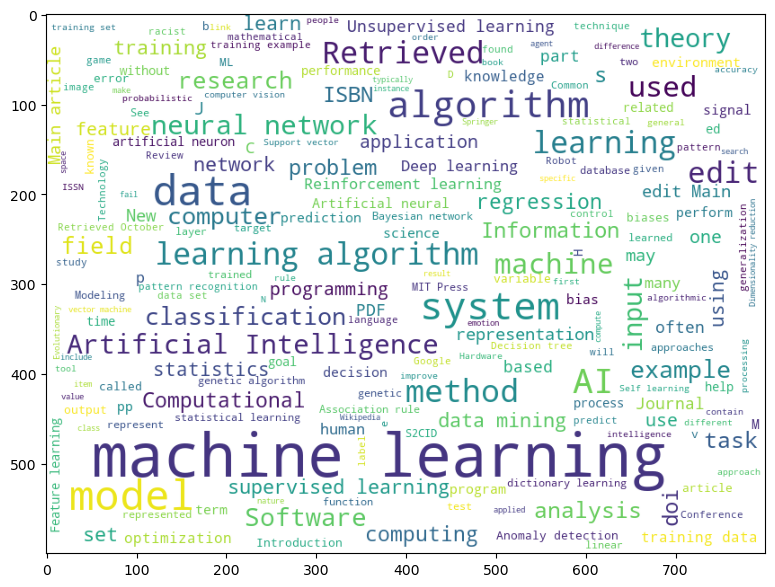

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Можете видети да облак речи сада изгледа импресивније, али такође садржи доста "буке" (нпр. неповезане речи као што је `Retrieved on`). Такође, добијамо мање кључних речи које се састоје од две речи, као што су *data scientist* или *computer science*. Ово је зато што RAKE алгоритам много боље бира добре кључне речи из текста. Овај пример илуструје важност претходне обраде и чишћења података, јер ће нам јасна слика на крају омогућити да доносимо боље одлуке.

У овој вежби смо прошли кроз једноставан процес извлачења значења из Википедијиног текста, у облику кључних речи и облака речи. Овај пример је прилично једноставан, али добро демонстрира све типичне кораке које ће један научник података предузети када ради са подацима, почевши од прикупљања података па све до визуализације.

На нашем курсу ћемо детаљно разговарати о свим тим корацима.



---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако настојимо да обезбедимо тачност, молимо вас да имате у виду да аутоматизовани преводи могу садржати грешке или нетачности. Оригинални документ на изворном језику треба сматрати ауторитативним извором. За критичне информације препоручује се професионални превод од стране људи. Не сносимо одговорност за било каква неспоразумевања или погрешна тумачења која могу произаћи из коришћења овог превода.
